# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson. 

<img src="https://i.imgur.com/49FNOHj.jpg">

# Import Statements

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

In [ ]:
colors = pd.read_csv("data/colors.csv")

In [ ]:
colors.head()

,id,name,rgb,is_trans
0,-1,[Unknown],0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [ ]:
colors["name"].nunique()

217

**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

In [ ]:
transparent = 0
opaque = 0

for color in colors["is_trans"]:
  if color == "t":
    transparent += 1
  elif color == "f":
    opaque += 1

print(f"There are {transparent} transparent and {opaque} opaque LEGO bricks")
  

There are 38 transparent and 179 opaque LEGO bricks


In [ ]:
# colors.groupby("is_trans").count()

In [ ]:
colors["is_trans"].value_counts()

f    179
t     38
Name: is_trans, dtype: int64

<h3>Understanding LEGO Themes vs. LEGO Sets</h3>

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

<img src = "https://i.imgur.com/aKcwkSx.png">

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

<img src = "https://i.imgur.com/whB1olq.png">

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows. 

In [ ]:
sets = pd.read_csv("data/sets.csv")

In [ ]:
sets.head()

,set_num,name,year,theme_id,num_parts,img_url
0,001-1,Gears,1965,1,43,https://cdn.rebrickable.com/media/sets/001-1.jpg
1,0011-2,Town Mini-Figures,1979,67,12,https://cdn.rebrickable.com/media/sets/0011-2.jpg
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0,https://cdn.rebrickable.com/media/sets/0011-3.jpg
3,0012-1,Space Mini-Figures,1979,143,12,https://cdn.rebrickable.com/media/sets/0012-1.jpg
4,0013-1,Space Mini-Figures,1979,143,12,https://cdn.rebrickable.com/media/sets/0013-1.jpg


In [ ]:
sets.tail()

,set_num,name,year,theme_id,num_parts,img_url
20598,XWING-1,Mini X-Wing Fighter,2019,158,60,https://cdn.rebrickable.com/media/sets/xwing-1...
20599,XWING-2,X-Wing Trench Run,2019,158,52,https://cdn.rebrickable.com/media/sets/xwing-2...
20600,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413,https://cdn.rebrickable.com/media/sets/yodachr...
20601,YTERRIER-1,Yorkshire Terrier,2018,598,0,https://cdn.rebrickable.com/media/sets/yterrie...
20602,ZX8000-1,ZX 8000 LEGO Sneaker,2020,501,0,https://cdn.rebrickable.com/media/sets/zx8000-...


**Challenge**: In which year were the first LEGO sets released and what were these sets called?

In [ ]:
year = sets.sort_values("year").iloc[0]["year"]
name = sets.sort_values("year").iloc[0]["name"]
print(f"The set name is {name} and it was released on {year}")

The set name is Extra-Large Gift Set (ABB) and it was released on 1949


**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [ ]:
# Filtering the DataFrame on a condition
sets[sets["year"] == 1949]

,set_num,name,year,theme_id,num_parts,img_url
12550,700.1-1,Extra-Large Gift Set (ABB),1949,365,142,https://cdn.rebrickable.com/media/sets/700.1-1...
12563,700.2-1,Large Gift Set (ABB),1949,365,178,https://cdn.rebrickable.com/media/sets/700.2-1...
12568,700.3-1,Medium Gift Set (ABB),1949,365,142,https://cdn.rebrickable.com/media/sets/700.3-1...
12573,700.A-1,Small Brick Set (ABB),1949,371,24,https://cdn.rebrickable.com/media/sets/700.a-1...
12574,700.B-1,Small Doors and Windows Set (ABB),1949,371,12,https://cdn.rebrickable.com/media/sets/700.b-1...


**Challenge**: Find the top 5 LEGO sets with the most number of parts. 

In [ ]:
sets.sort_values("num_parts", ascending=False)

,set_num,name,year,theme_id,num_parts,img_url
4195,31203-1,World Map,2021,709,11695,https://cdn.rebrickable.com/media/sets/31203-1...
384,10307-1,Eiffel Tower,2022,721,10001,https://cdn.rebrickable.com/media/sets/10307-1...
19466,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987,https://cdn.rebrickable.com/media/sets/bigbox-...
369,10294-1,Titanic,2021,721,9092,https://cdn.rebrickable.com/media/sets/10294-1...
350,10276-1,Colosseum,2020,721,9036,https://cdn.rebrickable.com/media/sets/10276-1...
...,...,...,...,...,...,...
4429,333614-3,Indiana Jones: The Original Adventures - DS,2008,742,0,https://cdn.rebrickable.com/media/sets/333614-...
4430,33363-1,Indiana Jones: The Original Adventures - Wii,2008,742,0,https://cdn.rebrickable.com/media/sets/33363-1...
14692,757894513191-1,Duplo Block Backpack,2021,501,0,https://cdn.rebrickable.com/media/sets/7578945...
14691,757894511777-1,Ninjago Backpack,2018,501,0,https://cdn.rebrickable.com/media/sets/7578945...


**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019? 

In [ ]:
sets_by_year = sets.groupby("year").count()
sets_by_year.tail()

,set_num,name,theme_id,num_parts,img_url
year,,,,,
2019,996,996,996,996,996
2020,1007,1007,1007,1007,1007
2021,1137,1137,1137,1137,1137
2022,961,961,961,961,961
2023,252,252,252,252,252


In [ ]:
sets_in_1955 = sets[sets["year"] == 1955]["set_num"].count()
sets_in_2019 = sets[sets["year"] == 2019]["set_num"].count()
print(sets_in_1955, sets_in_2019)

37 996


**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames. 

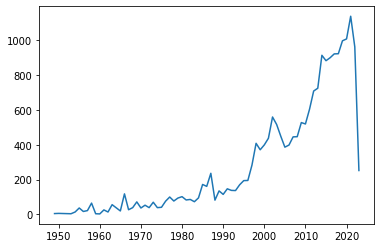

In [ ]:
plt.plot(sets_by_year.index, sets_by_year["set_num"])

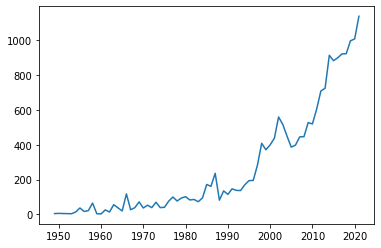

In [ ]:
plt.plot(sets_by_year.index[:-2], sets_by_year["set_num"][:-2])

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [ ]:
themes_by_year = sets.groupby("year").agg({"theme_id":pd.Series.nunique})

In [ ]:
themes_by_year.rename (columns = {"theme_id":"nr_themes"}, inplace = True)
themes_by_year.head()

,nr_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,5


**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021). 

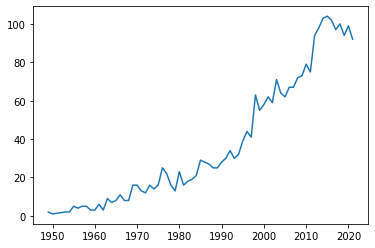

In [ ]:
plt.plot(themes_by_year.index[:-2], themes_by_year["nr_themes"][:-2])

### Line Charts with Two Seperate Axes

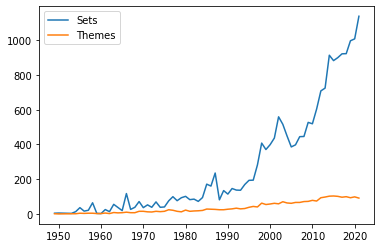

In [ ]:
plt.plot(sets_by_year.index[:-2], sets_by_year["set_num"][:-2], label = "Sets")
plt.plot(themes_by_year.index[:-2], themes_by_year["nr_themes"][:-2], label = "Themes")
plt.legend()


Text(0, 0.5, 'Number of Themes')

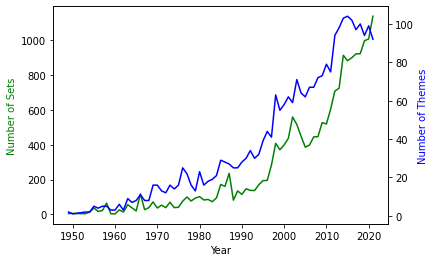

In [ ]:
ax1 = plt.gca() # get current axis
ax2 = ax1.twinx() # create another axis that shares the same axis 
ax1.plot(sets_by_year.index[:-2], sets_by_year["set_num"][:-2], label = "Sets", color = "green")
ax2.plot(themes_by_year.index[:-2], themes_by_year["nr_themes"][:-2], label = "Themes", color = "blue")
ax1.set_xlabel("Year")
ax1.set_ylabel("Number of Sets", color="green")
ax2.set_ylabel("Number of Themes", color="blue")

**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [ ]:
parts_per_set = sets.groupby("year").agg({"num_parts":pd.Series.mean})
parts_per_set.head()

,num_parts
year,
1949,99.600000
1950,1.000000
1953,12.500000
1954,8.357143
1955,12.567568


In [ ]:
parts_in_year_df = parts_per_set.loc[parts_per_set.index == 2017]
print(parts_in_year_df)

       num_parts
year            
2017  193.747014


### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart? 

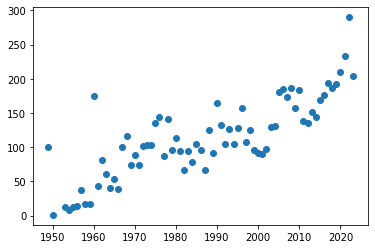

In [ ]:
plt.scatter(parts_per_set.index, parts_per_set["num_parts"])

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

In [ ]:
set_theme_count = sets["theme_id"].value_counts()
print(set_theme_count)

158    854
503    677
497    596
494    524
501    478
      ... 
411      1
156      1
210      1
510      1
414      1
Name: theme_id, Length: 453, dtype: int64


<img src="https://i.imgur.com/Sg4lcjx.png">

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [ ]:
themes = pd.read_csv("data/themes.csv")
themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,3,Competition,1.0
2,4,Expert Builder,1.0
3,16,RoboRiders,1.0
4,17,Speed Slammers,1.0


In [ ]:
star_wars_id = themes.loc[themes["name"] == "Star Wars"]
star_wars_id.head()

,id,name,parent_id
5,18,Star Wars,1.0
75,158,Star Wars,NaN
96,209,Star Wars,207.0
126,261,Star Wars,258.0


In [ ]:
for id in star_wars_id["id"]:
  star_wars_sets = sets[sets["theme_id"] == id]
  print(star_wars_sets)

       set_num                                name  year  theme_id  num_parts  \
11731  65081-1  R2-D2 / C-3PO Droid Collectors Set  2002        18          1   
15555   8000-1                           Pit Droid  2000        18        223   
15562   8001-1                        Battle Droid  2000        18        336   
15573   8002-1                     Destroyer Droid  2000        18        567   
15600   8007-1                               C-3PO  2001        18        339   
15601   8008-1                        Stormtrooper  2001        18        361   
15602   8009-1                               R2-D2  2002        18        239   
15603   8010-1                         Darth Vader  2002        18        388   
15615   8011-1                          Jango Fett  2002        18        425   
15618   8012-1                  Super Battle Droid  2002        18        378   
19891  K8008-1      Darth Vader / Stormtrooper Kit  2002        18          0   

                           

In [ ]:
set_theme_count = pd.DataFrame ({"id":set_theme_count.index, "set_count":set_theme_count.values})
set_theme_count.head()

,id,set_count
0,158,854
1,503,677
2,497,596
3,494,524
4,501,478


### Merging (i.e., Combining) DataFrames based on a Key


In [ ]:
merged_df = pd.merge(set_theme_count, themes, on="id")
merged_df.head()

,id,set_count,name,parent_id
0,158,854,Star Wars,NaN
1,503,677,Key Chain,501.0
2,497,596,Books,NaN
3,494,524,Friends,NaN
4,501,478,Gear,NaN


<BarContainer object of 10 artists>

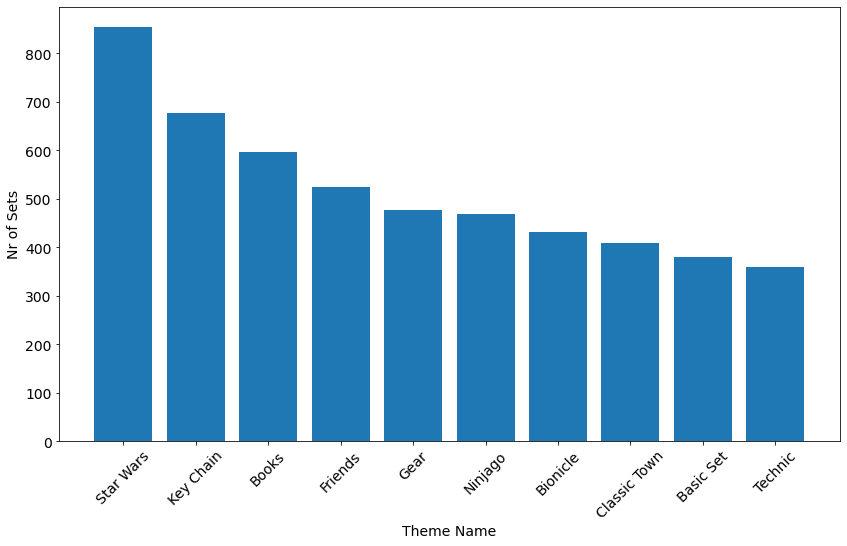

In [ ]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('Nr of Sets', fontsize=14)
plt.xlabel('Theme Name', fontsize=14)

plt.bar(merged_df["name"][:10], merged_df["set_count"][:10])